In [1]:
import numpy as np
import re
import pandas as pd
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
# from google.colab import drive, files

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
import tqdm as notebook_tqdm

import tensorflow_datasets as tfds
from keras.utils.vis_utils import plot_model
print(tf.test.gpu_device_name())


/home/ficast/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/device:GPU:0


2022-07-24 10:55:14.547742: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-24 10:55:15.119492: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 5852 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
loaded_model = tf.keras.models.load_model('amazon_nlp/')

# Check its architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 100)         40100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 256)               25856     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

2022-07-24 10:55:21.793865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5852 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


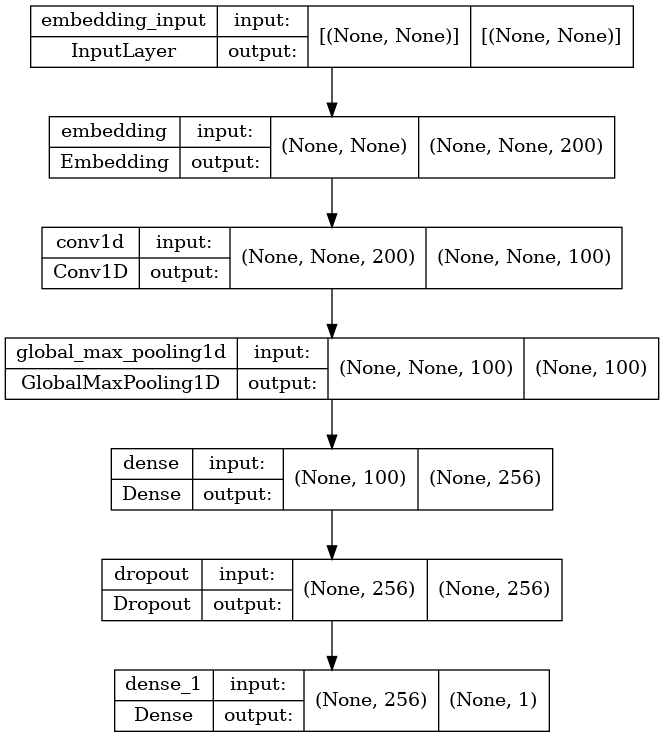

In [4]:
tf.keras.utils.plot_model(loaded_model, to_file="model_plot.png", show_shapes=True)

In [33]:
for layer in loaded_model.layers:
    name = layer.name.upper()
    weights = layer.get_weights()
    bias = layer.bias if hasattr(layer, 'bias') else None

    print("*** LAYER: " + name +" ***")
    print("")
    
    print("SHAPE")
    print(layer.output_shape)
    print("")
    print("WEIGHTS")
    print(weights)
    
    print("")
    print("BIAS")
    print(bias)
    print("")
    print("______________________________________________________________________________")

*** LAYER: EMBEDDING ***

SHAPE
(None, None, 200)

WEIGHTS
[array([[ 0.15528782, -0.21420176, -0.22509146, ..., -0.37304172,
         0.07972623,  1.060603  ],
       [ 0.18080051, -0.09224321,  0.09057155, ...,  0.83917516,
        -0.07497481, -0.17229581],
       [-0.09186625,  0.05395899, -0.37342837, ...,  0.23976956,
        -0.13281776, -0.03359287],
       ...,
       [-0.30952284,  0.70812434,  0.53387415, ...,  0.09199147,
         0.44265917, -0.34591553],
       [ 0.07550365,  0.8007671 ,  0.462881  , ...,  0.09926121,
        -0.9211489 ,  0.54288316],
       [-0.96409297, -0.8405242 , -1.1178211 , ..., -0.00156975,
        -1.0788189 ,  0.58918214]], dtype=float32)]

BIAS
None

______________________________________________________________________________
*** LAYER: CONV1D ***

SHAPE
(None, None, 100)

WEIGHTS
[array([[[ 0.04446418, -0.20508139,  0.16219047, ..., -0.21684317,
          0.35694686, -0.03455402],
        [-0.050228  , -0.4783959 , -0.0920164 , ..., -0.63975